In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fmendes/fmendesdat263xdemos")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fmendesdat263xdemos' dataset.
Path to dataset files: /kaggle/input/fmendesdat263xdemos


In [13]:
df1 = pd.read_csv(path + '/calories.csv')
df1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [11]:
df2 = pd.read_csv(path + '/exercise.csv')
df2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [12]:
df = df1.merge(df2, on='User_ID')
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [14]:
df.shape

(15000, 9)

In [15]:
df.isnull().sum()

,0
User_ID,0
Calories,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [19]:
df.describe()


,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,0.496467,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,0.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [18]:
df['Gender'] = df['Gender'].map({'female': 0, 'male': 1})
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,1,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,0,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,1,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,0,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,0,27,154.0,58.0,10.0,81.0,39.8


data visualization

In [20]:
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

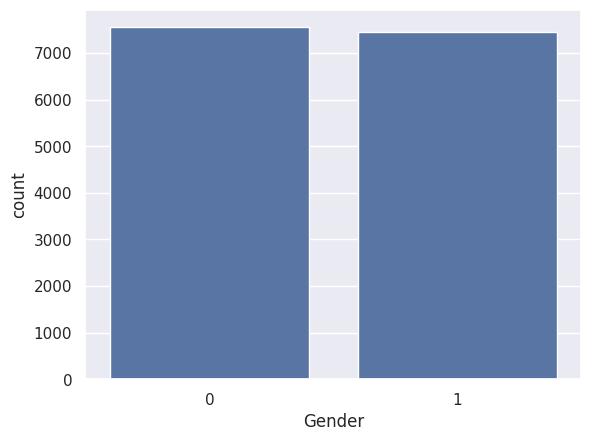

In [22]:
sns.countplot(x='Gender', data=df)

/tmp/ipython-input-3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

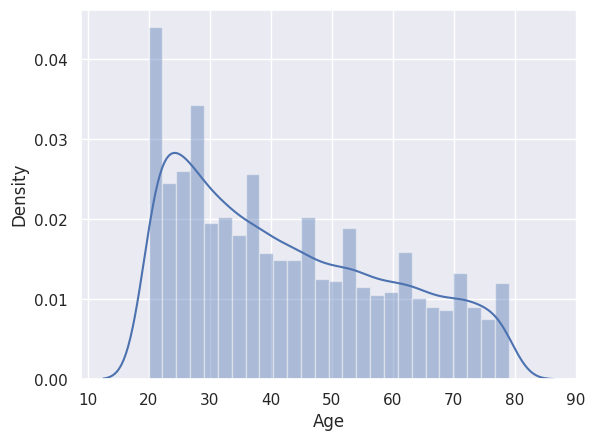

In [23]:
sns.distplot(df['Age'])

/tmp/ipython-input-3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

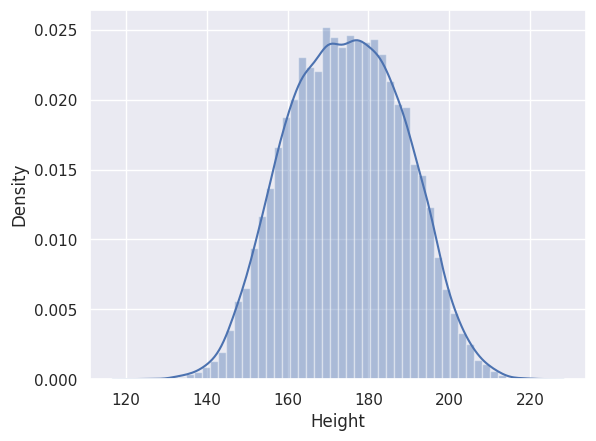

In [24]:
sns.distplot(df['Height'])

/tmp/ipython-input-1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

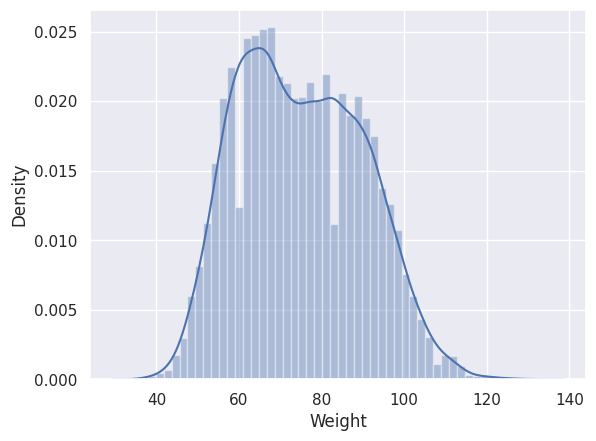

In [25]:
sns.distplot(df['Weight'])

/tmp/ipython-input-1351347043.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Duration'])


<Axes: xlabel='Duration', ylabel='Density'>

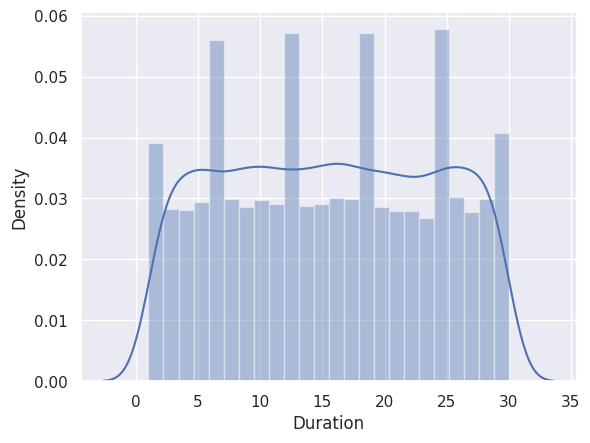

In [26]:
sns.distplot(df['Duration'])

/tmp/ipython-input-4154507538.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Heart_Rate'])


<Axes: xlabel='Heart_Rate', ylabel='Density'>

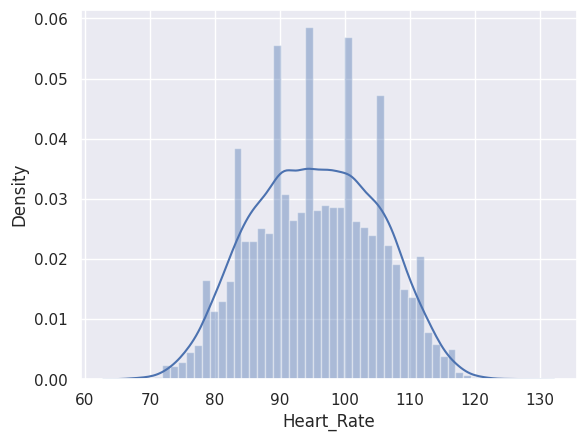

In [27]:
sns.distplot(df['Heart_Rate'])

/tmp/ipython-input-3220751949.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Body_Temp'])


<Axes: xlabel='Body_Temp', ylabel='Density'>

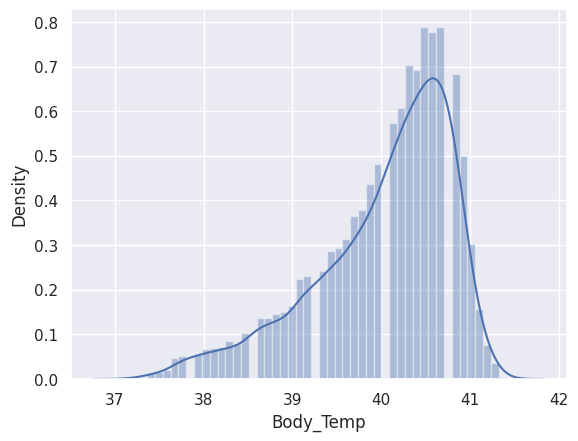

In [28]:
sns.distplot(df['Body_Temp'])

/tmp/ipython-input-1463722021.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Calories'])


<Axes: xlabel='Calories', ylabel='Density'>

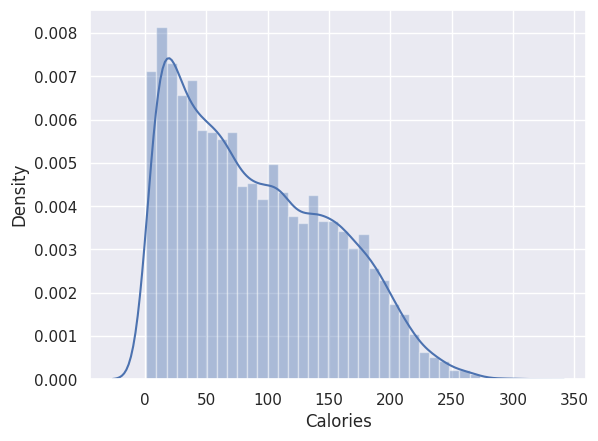

In [29]:
sns.distplot(df['Calories'])

In [30]:
correlation = df.corr()
correlation

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
User_ID,1.000000,-0.001661,-0.000687,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923
Calories,-0.001661,1.000000,0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558
Gender,-0.000687,0.022357,1.000000,0.003222,0.710534,0.783186,0.003440,0.011555,0.007264
Age,-0.001827,0.154395,0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175
Height,-0.013520,0.017537,0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200
Weight,-0.011603,0.035481,0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095
Duration,-0.002751,0.955421,0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167
Heart_Rate,-0.000457,0.897882,0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529
Body_Temp,0.000923,0.824558,0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000


<Axes: >

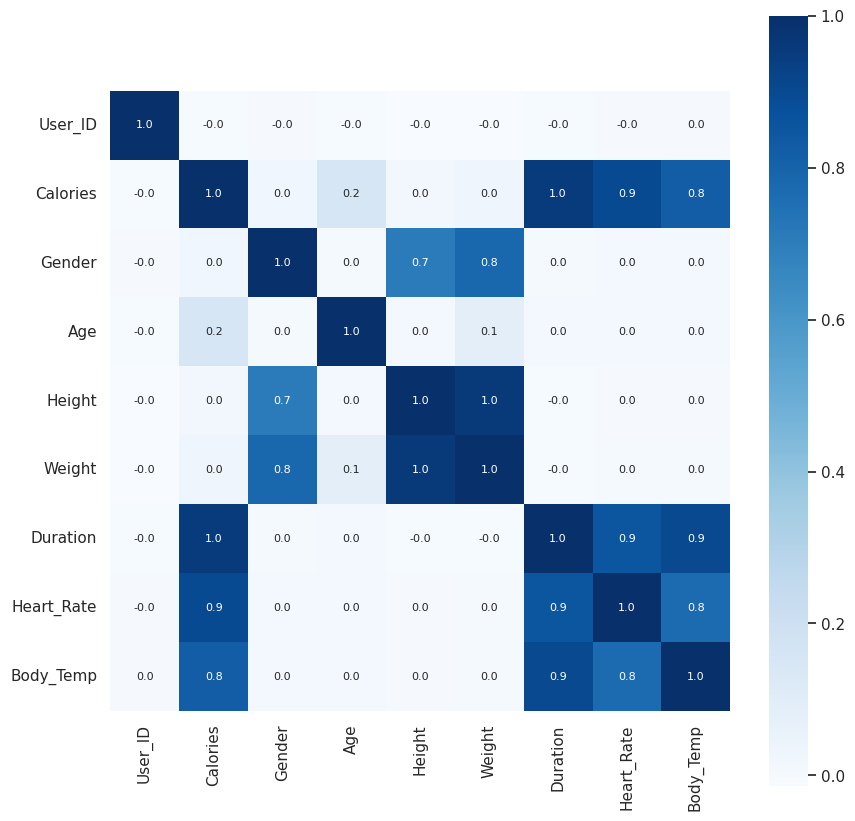

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [34]:
X = df.drop(columns=['User_ID', 'Calories'], axis=1)
Y = df['Calories']

In [35]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [37]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [40]:
model = XGBRegressor()

In [41]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [43]:
#evaluate train and test data

training_data_prediction = model.predict(X_train)
r2score = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared value = ', r2score)

R Squared value =  0.9995691477017405


In [44]:
test_data_prediction = model.predict(X_test)
r2score = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared value = ', r2score)

R Squared value =  0.998800624504713


In [53]:
#inference system

input = (
    df['Gender'][1],
    df['Age'].median(),
    df['Height'].median(),
    df['Weight'].max(),
    df['Duration'].max(),
    df['Heart_Rate'].median(),
    df['Body_Temp'].max()
)
input_as_numpy_array = np.asarray(input)
input_reshaped = input_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_reshaped)
print(prediction)
print(input_reshaped)



[168.32057]
[[  0.   39.  175.  132.   30.   96.   41.5]]
